# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : 

---

# Observations et environnement
---

## Environnement

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [20]:
filename = 'data/imports/Résultats_VAGO_ObsInfo900/vago.csv'

In [21]:
df_vago = pd.read_csv(filename)

In [28]:
df_vago

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,p_count,text,c_count,p_size,url_h,totalSentence,totalPrecise,meanRatioVague,meanRatioOpinion,meanRatioPV
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,"['Accueil', 'Actualités', 'Communauté']",['L’Arabie saoudite a organisé un événement po...,2022-10-31 00:00:00,NaN,NaN,Par Youcef -,...,8,L’Arabie saoudite organise des célébrations d'...,2359,294.875000,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f,13,5,0.615385,0.615385,0.256410
1,https://lesmoutonsrebelles.com/les-reseaux-soc...,lesmoutonsrebelles.com,Les réseaux sociaux coupés volontairement ? Qu...,Il semblerait que la panne mondiale des réseau...,[],['Il semblerait que la panne mondiale des rése...,NaN,NaN,NaN,NaN,...,13,Les réseaux sociaux coupés volontairement ? Qu...,3723,286.384615,78521e5bf45d5d672a403958243a58fd95855660,20,9,0.650000,0.400000,0.254881
2,https://lesmoutonsrebelles.com/un-rapport-du-p...,lesmoutonsrebelles.com,Un rapport du Pentagone affirme que les extrat...,Selon une énorme base de données de documents ...,[],['Selon une énorme base de données de document...,NaN,NaN,NaN,NaN,...,17,Un rapport du Pentagone affirme que les extrat...,3545,208.529412,db5f4fe97288e2cb2982f2f3f084f299b4bac7a0,10,5,0.700000,0.600000,0.298333
3,https://lesmoutonsrebelles.com/un-sondage-defa...,lesmoutonsrebelles.com,Un sondage défavorable pour Emmanuel Macron su...,"Des internautes, dont des politiques, ont affi...",[],"['Des internautes, dont des politiques, ont af...",NaN,NaN,NaN,NaN,...,14,Un sondage défavorable pour Emmanuel Macron su...,1928,137.714286,8189af39fedefc6c901fc8b3a1717fdf5288d7fc,12,5,0.416667,0.416667,0.224405
4,https://lemediaen442.fr/le-president-ukrainien...,lemediaen442.fr,Le président ukrainien Zelensky se cache dans ...,Le courage de Zelensky aura été de courte duré...,"['Politique', 'ukraine', 'volodymyr zelensky']",['Le courage de Zelensky aura été de courte du...,2022-03-05T14:55:48+01:00,NaN,NaN,NaN,...,8,Le président ukrainien Zelensky se cache dans ...,2045,255.625000,0c2e41f58ac869eb95865751caa3ab29a9f0cd13,13,2,0.307692,0.230769,0.125641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,https://lezarceleurs.blogspot.com/2022/04/des-...,lezarceleurs.blogspot.com,Des victimes de test PCR témoignent,De : https://www.naturalnews.com/2022-04-21-vi...,"['accidents', 'COVID-19', 'Test PCR', 'victimes']",['\xa0De :\xa0https://www.naturalnews.com/2022...,NaN,NaN,NaN,NaN,...,29,Des victimes de test PCR témoignent\n De : ht...,6042,208.344828,e6cf82ff921171ab67ac2b45ce27dca77a397c1a,31,17,0.709677,0.677419,0.325806
900,https://www.francesoir.fr/politique-monde/resu...,www.francesoir.fr,Résultats de l’audit en Arizona : 54 000 bulle...,"CHRONIQUE - Le 24 septembre, le rapport d’audi...","['Accueil', 'Politique']","['CHRONIQUE - Le 24 septembre, le rapport d’au...",2021-09-29 13:37:00,NaN,NaN,"Auteur(s)\nElisabeth Dancet, pour FranceSoir",...,12,Résultats de l’audit en Arizona : 54 000 bulle...,10542,878.500000,c587dbcf33207a0a5c066bcf21cff88cd9fe1c9d,46,20,0.739130,0.565217,0.261580
901,https://www.francetvinfo.fr/meteo/orages/tempe...,www.francetvinfo.fr,Tempête Aurore : de puissantes rafales de vent...,Le département du Finistère a été frappé par l...,[],['Le département du Finistère a été frappé par...,2021-10-21 22:53:00,La moitié nord de la France a été frappée par ...,NaN,"H. Puffeney, A.Lay, J. Jonas, J. Chouquet, Fra...",...,2,Tempête Aurore : de puissantes rafales de vent...,1378,689.000000,6a77dfe2e50deec474b1373bb7180e39a98bbd0d,12,2,0.416667,0.416667,0.097222
902,https://www.francetvinfo.fr/sports/directs/dir...,www.francetvinfo.fr,Euro 2021 : revivez la victoire des Belges sur...,"Pour son quatrième tournoi majeur consécutif, ...",[],"[""Pour son quatrième tournoi majeur consécutif...",2021-06-27 20:14:00,Les tena

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
899    1.0
900    1.0
901    0.0
902    0.0
903    1.0
Name: infox, Length: 904, dtype: float64

# Experience
---

## Etude des données Vago

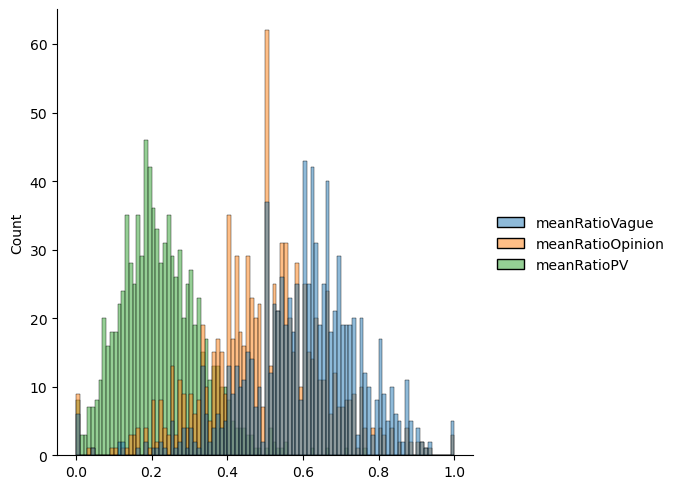

In [31]:
sns.displot(df_vago[['meanRatioVague','meanRatioOpinion','meanRatioPV']],bins=100)

In [32]:
df_vago['vague']=df_vago['meanRatioVague'].apply(lambda x: 1.0 if x>0.5 else 0.0)

In [33]:
df_vago['opinion']=df_vago['meanRatioOpinion'].apply(lambda x: 1.0 if x>0.5 else 0.0)

In [34]:
df_vago

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,c_count,p_size,url_h,totalSentence,totalPrecise,meanRatioVague,meanRatioOpinion,meanRatioPV,vague,opinion
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,"['Accueil', 'Actualités', 'Communauté']",['L’Arabie saoudite a organisé un événement po...,2022-10-31 00:00:00,NaN,NaN,Par Youcef -,...,2359,294.875000,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f,13,5,0.615385,0.615385,0.256410,1.0,1.0
1,https://lesmoutonsrebelles.com/les-reseaux-soc...,lesmoutonsrebelles.com,Les réseaux sociaux coupés volontairement ? Qu...,Il semblerait que la panne mondiale des réseau...,[],['Il semblerait que la panne mondiale des rése...,NaN,NaN,NaN,NaN,...,3723,286.384615,78521e5bf45d5d672a403958243a58fd95855660,20,9,0.650000,0.400000,0.254881,1.0,0.0
2,https://lesmoutonsrebelles.com/un-rapport-du-p...,lesmoutonsrebelles.com,Un rapport du Pentagone affirme que les extrat...,Selon une énorme base de données de documents ...,[],['Selon une énorme base de données de document...,NaN,NaN,NaN,NaN,...,3545,208.529412,db5f4fe97288e2cb2982f2f3f084f299b4bac7a0,10,5,0.700000,0.600000,0.298333,1.0,1.0
3,https://lesmoutonsrebelles.com/un-sondage-defa...,lesmoutonsrebelles.com,Un sondage défavorable pour Emmanuel Macron su...,"Des internautes, dont des politiques, ont affi...",[],"['Des internautes, dont des politiques, ont af...",NaN,NaN,NaN,NaN,...,1928,137.714286,8189af39fedefc6c901fc8b3a1717fdf5288d7fc,12,5,0.416667,0.416667,0.224405,0.0,0.0
4,https://lemediaen442.fr/le-president-ukrainien...,lemediaen442.fr,Le président ukrainien Zelensky se cache dans ...,Le courage de Zelensky aura été de courte duré...,"['Politique', 'ukraine', 'volodymyr zelensky']",['Le courage de Zelensky aura été de courte du...,2022-03-05T14:55:48+01:00,NaN,NaN,NaN,...,2045,255.625000,0c2e41f58ac869eb95865751caa3ab29a9f0cd13,13,2,0.307692,0.230769,0.125641,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,https://lezarceleurs.blogspot.com/2022/04/des-...,lezarceleurs.blogspot.com,Des victimes de test PCR témoignent,De : https://www.naturalnews.com/2022-04-21-vi...,"['accidents', 'COVID-19', 'Test PCR', 'victimes']",['\xa0De :\xa0https://www.naturalnews.com/2022...,NaN,NaN,NaN,NaN,...,6042,208.344828,e6cf82ff921171ab67ac2b45ce27dca77a397c1a,31,17,0.709677,0.677419,0.325806,1.0,1.0
900,https://www.francesoir.fr/politique-monde/resu...,www.francesoir.fr,Résultats de l’audit en Arizona : 54 000 bulle...,"CHRONIQUE - Le 24 septembre, le rapport d’audi...","['Accueil', 'Politique']","['CHRONIQUE - Le 24 septembre, le rapport d’au...",2021-09-29 13:37:00,NaN,NaN,"Auteur(s)\nElisabeth Dancet, pour FranceSoir",...,10542,878.500000,c587dbcf33207a0a5c066bcf21cff88cd9fe1c9d,46,20,0.739130,0.565217,0.261580,1.0,1.0
901,https://www.francetvinfo.fr/meteo/orages/tempe...,www.francetvinfo.fr,Tempête Aurore : de puissantes rafales de vent...,Le département du Finistère a été frappé par l...,[],['Le département du Finistère a été frappé par...,2021-10-21 22:53:00,La moitié nord de la France a été frappée par ...,NaN,"H. Puffeney, A.Lay, J. Jonas, J. Chouquet, Fra...",...,1378,689.000000,6a77dfe2e50deec474b1373bb7180e39a98bbd0d,12,2,0.416667,0.416667,0.097222,0.0,0.0
902,https://www.francetvinfo.fr/sports/directs/dir...,www.francetvinfo.fr,Euro 2021 : revivez la victoire des Belges sur...,"Pour son quatrième tournoi majeur consécutif, ...",[],"[""Pour son quatrième tournoi majeur consécutif...",2021-06-27 20:14:00,Les tenants du titre portugais abandonnent leu...,NaN,franceinfo: sport,...,828,414.000000,ec2b1e32cbac75d21b7ecfa1ea90d82a41300dd1,5,3,0.600000,0.600000,0.333333,1.0,1.0


# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---